In [47]:
# XOR 연산 학습해보기
xor_input =  [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [48]:
import pandas as pd

In [49]:
# 학습 전용 데이터와 테스트 전용 데이터로 분류
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2]
xor_label = xor_df.iloc[:,2]
print(xor_data)
print("-"*10)
print(xor_label)

   0  1
0  0  0
1  0  1
2  1  0
3  1  1
----------
0    0
1    1
2    1
3    0
Name: 2, dtype: int64


In [50]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics

In [51]:
clf = svm.SVC()
# SVC: classification; SVR: regression
clf.fit(xor_data,xor_label)
pred = clf.predict(xor_data)
pred

array([0, 1, 1, 0])

In [52]:
# 정답을 구하기
metrics.accuracy_score(xor_label, pred)

1.0

In [53]:
clf = svm.SVC()
# SVC: classification; SVR: regression
clf.fit(xor_data,xor_label)
clf.score(xor_data,xor_label)

1.0

In [54]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [56]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
# 품종을 컬러값으로 구분하기
color_tmp = []
for name in iris['Name']:
    if name == "Iris-setosa":
        color_tmp.append('red')
    elif name == "Iris-versicolor":
        color_tmp.append('green')
    else:
        color_tmp.append('blue')

iris['Color'] = color_tmp
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [58]:
iris.loc[iris['Name']=='Iris-setosa','Color'] = 'red'
iris.loc[iris['Name']=='Iris-versicolor','Color'] = 'green'
iris.loc[iris['Name']=='Iris-virginica','Color'] = 'blue'
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue


In [59]:
# Scatter
import matplotlib.pyplot as plt

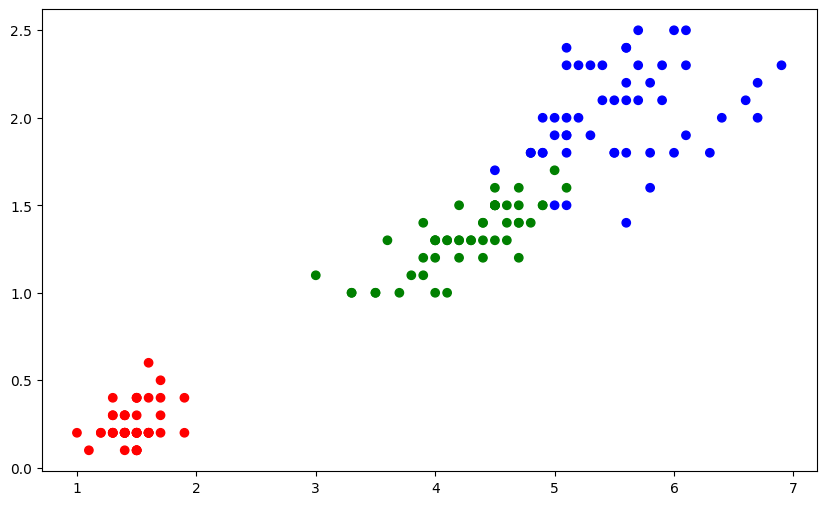

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(
    iris['PetalLength'],
    iris['PetalWidth'],
    c=iris['Color']
)

In [61]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Color'],
      dtype='object')

In [62]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris['Name']
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [63]:
# 학습용과 테스트용 나누기
from sklearn.model_selection import train_test_split

In [64]:
# 8:2로 나눔
train_data, test_data, train_label, test_label = train_test_split(iris_data,iris_label)

In [65]:
print(len(train_data))
print(len(test_data))
print(len(train_label))
print(len(test_label))

112
38
112
38


In [91]:
# SVM으로 학습시키기
clf = svm.SVC()
clf.fit(train_data,train_label)
pred = clf.predict(test_data)
pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [67]:
clf.score(train_data,train_label)

0.9732142857142857

In [68]:
clf.score(test_data,test_label)

0.9736842105263158

In [73]:
print(metrics.classification_report(test_label,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



### 분류 Report 이해하기
번호: [1,2,3,4,5,6]     
정답: [음치,음치,음치,음치,정상,정상]    
예측: [음치,음치,정상,정상,정상,정상]   

정확도: 예측이 맞은 비율?   
4 / 6 = 2 / 3 = 0.66    

정밀도: 음치라고 예측한 사람들 중에 진짜 음치가 얼마나 있는가?  
2 / 2 = 1.0 

재현율: 
전체 음치 중에서 내가 맞춘 음치의 비율  
2 / 4 = 0.5 
전체 정상 중에서 내가 맞춘 정상의 비율  
4 / 2 = 2 (과소적합)

F1 Score: 정밀도와 재현율의 평균    
2 * 정밀도 * 재현율 / (정밀도 + 재현율) = 1 / 1.5 = 0.66 (=정확도)  

In [74]:
import numpy as np

In [86]:
y = np.array([1,1,1,1,0,0])
p = np.array([1,1,0,0,0,0])

# 정확도
print("정확도:",np.mean(np.equal(y, p)))

# 정밀도
right = np.sum(y*p==1)
precision = right/np.sum(p)
print("정밀도:",precision)

# 재현율
recall = right/np.sum(y)
print("재현율:",recall)

# f1 score
f1 = 2 * precision * recall / (precision+recall)
print("f1:",f1)

정확도: 0.6666666666666666
정밀도: 1.0
재현율: 0.5
f1: 0.6666666666666666


---

In [90]:
print("accuracy:",metrics.accuracy_score(y,p))
print('precision:',metrics.precision_score(y,p))
print('recall:',metrics.recall_score(y,p))
print("f1:",metrics.f1_score(y,p))

accuracy: 0.6666666666666666
precision: 1.0
recall: 0.5
f1: 0.6666666666666666


---